<a href="https://colab.research.google.com/github/vincentdar/GudangColab/blob/main/YOLOv5_finetune.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/ultralytics/yolov5.git

Cloning into 'yolov5'...
remote: Enumerating objects: 10839, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (4/4), done.
remote: Total 10839 (delta 1), reused 5 (delta 1), pack-reused 10834
Receiving objects: 100% (10839/10839), 10.93 MiB | 33.91 MiB/s, done.
Resolving deltas: 100% (7487/7487), done.


In [2]:
!python yolov5/export.py --weights yolov5s.pt --include saved_model

export: data=yolov5/data/coco128.yaml, weights=['yolov5s.pt'], imgsz=[640, 640], batch_size=1, device=cpu, half=False, inplace=False, train=False, optimize=False, int8=False, dynamic=False, simplify=False, opset=12, verbose=False, workspace=4, nms=False, agnostic_nms=False, topk_per_class=100, topk_all=100, iou_thres=0.45, conf_thres=0.25, include=['saved_model']
YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.0+cu111 CPU

100% 14.0M/14.0M [00:00<00:00, 155MB/s]

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients

PyTorch: starting from yolov5s.pt (14.7 MB)

TensorFlow SavedModel: starting export with tensorflow 2.7.0...

                 from  n    params  module                                  arguments                     
2022-02-04 01:43:55.927149: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
  0                -1  1      3520  models.common.Conv                      [3, 32, 6

In [3]:
import tensorflow as tf
import numpy as np

In [4]:
model = tf.keras.models.load_model("yolov5s_saved_model")
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(1, 640, 640, 3)]   0           []                               
                                                                                                  
 tf_conv (TFConv)               (1, 320, 320, 32)    3488        ['input_1[0][0]']                
                                                                                                  
 tf_conv_1 (TFConv)             (1, 160, 160, 64)    18496       ['tf_conv[0][0]']                
                                                                                                  
 tfc3 (TFC3)                    (1, 160, 160, 64)    18624       ['tf_conv_1[0][0]']              
                                                                                              

In [5]:
!wget "https://cdn-2.tstatic.net/wartakota/foto/bank/images/pengalihan-lalu-lintas-di-perempatan-sumur-bor12.jpg"

--2022-02-04 01:44:55--  https://cdn-2.tstatic.net/wartakota/foto/bank/images/pengalihan-lalu-lintas-di-perempatan-sumur-bor12.jpg
Resolving cdn-2.tstatic.net (cdn-2.tstatic.net)... 18.67.65.74, 18.67.65.101, 18.67.65.40, ...
Connecting to cdn-2.tstatic.net (cdn-2.tstatic.net)|18.67.65.74|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 72169 (70K) [image/jpeg]
Saving to: ‘pengalihan-lalu-lintas-di-perempatan-sumur-bor12.jpg’

pengalihan-lalu-lin 100%[===================>]  70.48K   157KB/s    in 0.4s    

2022-02-04 01:44:56 (157 KB/s) - ‘pengalihan-lalu-lintas-di-perempatan-sumur-bor12.jpg’ saved [72169/72169]



In [10]:
!wget "https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg"

--2022-02-04 01:48:33--  https://upload.wikimedia.org/wikipedia/commons/1/18/Dog_Breeds.jpg
Resolving upload.wikimedia.org (upload.wikimedia.org)... 208.80.154.240, 2620:0:861:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|208.80.154.240|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 70761 (69K) [image/jpeg]
Saving to: ‘Dog_Breeds.jpg’

Dog_Breeds.jpg      100%[===================>]  69.10K  --.-KB/s    in 0.003s  

2022-02-04 01:48:33 (20.9 MB/s) - ‘Dog_Breeds.jpg’ saved [70761/70761]



In [11]:
!python yolov5/detect.py --weights yolov5s.pt --source dog.jpg

detect: weights=['yolov5s.pt'], source=dog.jpg, data=yolov5/data/coco128.yaml, imgsz=[640, 640], conf_thres=0.25, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=yolov5/runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.0-231-g9bc72a3 torch 1.10.0+cu111 CUDA:0 (Tesla T4, 15110MiB)

Fusing layers... 
Model Summary: 213 layers, 7225885 parameters, 0 gradients
image 1/1 /content/dog.jpg: 480x640 1 dog, Done. (0.022s)
Speed: 0.5ms pre-process, 21.7ms inference, 1.3ms NMS per image at shape (1, 3, 640, 640)
Results saved to yolov5/runs/detect/exp3


In [17]:
import cv2
import matplotlib.pyplot as plt

In [40]:
def load_and_prep_image(filename, img_shape=640):
    """
    Reads an image from filename, turns it into a tensor and reshapes it to (img_shape, img_shape, color_channels)
    """
    # Read in the image
    img = tf.io.read_file(filename)
    # Decode the image
    img = tf.image.decode_image(img)
    # Resize the image
    img = tf.image.resize(img, size=[img_shape, img_shape])
    # Rescale the image
    img = img/255.

    return img



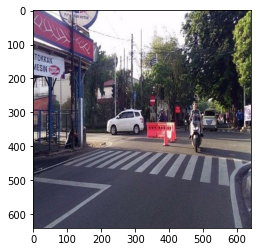

In [54]:
img = load_and_prep_image("tes.jpg")
plt.imshow(img)

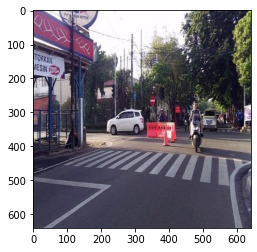

In [ ]:
# img = cv2.imread("tes.jpg", )
# # convert color image into grayscale image
# img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img1 = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# img1 = cv2.resize(img1, (640, 640), interpolation = cv2.INTER_AREA)

# # plot that grayscale image with Matplotlib
# # cmap stands for colormap

# plt.imshow(img1)

In [43]:
for i, layer in enumerate(model.layers):
    print(f"{i}. {layer.name} , {layer.trainable}")

0. input_1 , True
1. tf_conv , False
2. tf_conv_1 , False
3. tfc3 , False
4. tf_conv_7 , False
5. tfc3_1 , False
6. tf_conv_15 , False
7. tfc3_2 , False
8. tf_conv_25 , False
9. tfc3_3 , False
10. tfsppf , False
11. tf_conv_33 , False
12. tf_upsample , False
13. tf_concat , False
14. tfc3_4 , False
15. tf_conv_39 , False
16. tf_upsample_1 , False
17. tf_concat_1 , False
18. tfc3_5 , False
19. tf_conv_45 , False
20. tf_concat_2 , False
21. tfc3_6 , False
22. tf_conv_51 , False
23. tf_concat_3 , False
24. tfc3_7 , False
25. tf_detect , False


Text(0.5, 1.0, '(640, 640, 3)')

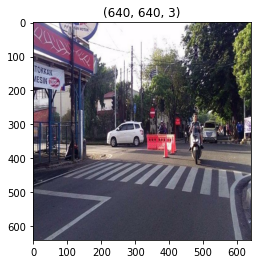

In [ ]:
import matplotlib.pyplot as plt
img = load_and_prep_image("tes.jpg")
plt.imshow(img)
plt.title(img.shape)

In [20]:
class_names = ['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light',
        'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
        'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee',
        'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard',
        'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
        'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch',
        'potted plant', 'bed', 'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
        'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear',
        'hair drier', 'toothbrush']

In [32]:
class_names[16]

'dog'

In [22]:
def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = np.copy(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y

In [55]:
pred = model.predict(tf.expand_dims(img, axis=0))
pred.shape

(1, 25200, 85)

In [56]:
xywh = pred[0, 0, :5]
xywh

array([8.1125339e-03, 4.7305296e-03, 1.8929452e-02, 1.6992673e-02,
       7.9784222e-06], dtype=float32)

In [57]:
nc = pred.shape[2] - 5
xc = pred[..., 4] > 0.25  # candidates
nc, xc

(80, array([[False, False, False, ..., False, False, False]]))

In [58]:
output = [tf.zeros(shape=(0, 6))]
print(output)
for xi, x in enumerate(pred):
    # So the enumerate change the batch size to index, and then from candidates which
    # passed the conf threshold are going to be picked to x (25200, 85) to (132, 85) for 
    # tes.jpg
    x = x[xc[xi]]
    x[:, 5:] *= x[:, 4:5]
    box = xywh2xyxy(x[:, :4])
    
    # Choose best class
    conf = x[:, 5:].max(1, keepdims=True)
    c = x[:, 5:].argmax(axis=1)
    c = np.expand_dims(c, axis=-1)

    x = np.concatenate((box, conf, c), axis=1)

    boxes, scores = x[:, :4], x[:, 4]

    i = tf.image.non_max_suppression(boxes, scores, 30, iou_threshold=0.45)

    print(x.shape)
    output[xi] = x[i, :]


print(output)

[<tf.Tensor: shape=(0, 6), dtype=float32, numpy=array([], shape=(0, 6), dtype=float32)>]
(132, 6)
[array([[ 0.33718348,  0.45519057,  0.51207298,  0.57450378,  0.87536711,
         2.        ],
       [ 0.775392  ,  0.44905925,  0.84746188,  0.55556571,  0.67198646,
         2.        ],
       [ 0.70701784,  0.41584656,  0.78021413,  0.58746594,  0.66906017,
         0.        ],
       [ 0.06939599,  0.24934366,  0.12363113,  0.30355921,  0.64004511,
        11.        ],
       [ 0.57399452,  0.45395947,  0.61609387,  0.51406497,  0.55027461,
         0.        ],
       [ 0.71232891,  0.48908412,  0.7833606 ,  0.65213966,  0.43807203,
         1.        ],
       [ 0.69376653,  0.49715549,  0.71614307,  0.55959564,  0.2697188 ,
         1.        ],
       [ 0.8474648 ,  0.47287673,  0.87265718,  0.52010804,  0.2381164 ,
         0.        ]])]


In [ ]:
import cv2

In [59]:
bbox = output[0]
bbox[0]

array([0.33718348, 0.45519057, 0.51207298, 0.57450378, 0.87536711,
       2.        ])

In [60]:
img_annotated = img.numpy()
type(img_annotated)

numpy.ndarray

In [61]:
boxes, objectness, classes, nums = bbox[:, 0:4], bbox[:, 4], bbox[:, 5], bbox.shape[0]
boxes=np.array(boxes)

for i in range(nums):
    x1y1 = tuple((boxes[i,0:2] * [img_annotated.shape[1], img_annotated.shape[0]]).astype(np.int32))
    x2y2 = tuple((boxes[i,2:4] * [img_annotated.shape[1], img_annotated.shape[0]]).astype(np.int32))

    print(x1y1, x2y2)
    img_annotated = cv2.rectangle(img_annotated, x1y1, x2y2, (255,0,0), 2)

    img_annotated = cv2.putText(img_annotated, '{} {:.4f}'.format(
        class_names[int(classes[i])], objectness[i]),
                        (x1y1), cv2.FONT_HERSHEY_PLAIN, 1, (0, 0, 255), 2)



(215, 291) (327, 367)
(496, 287) (542, 355)
(452, 266) (499, 375)
(44, 159) (79, 194)
(367, 290) (394, 329)
(455, 313) (501, 417)
(444, 318) (458, 358)
(542, 302) (558, 332)


In [62]:
cv2.imwrite("result.jpg", img_annotated * 255)

True

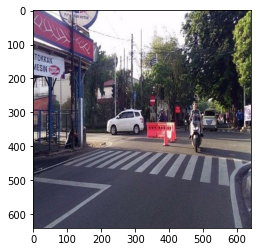

In [ ]:
plt.imshow(img_annotated)